In [1]:
# Colab: http://dojo.geleia.group/

# Tutorial: https://medium.com/geleia/dojo-data-science-online-27122abea61b

# Dataset: http://data.geleia.group

# Populacao: http://pop.geleia.group

# Cidades: http://cities.geleia.group

# Objetivo: predizer doença cardiovascular

# Meta: AUC > 0.75 | Sens > 80% | Espec: 95%

In [2]:
# Dataset: corona-virus-brazil

# Objetivo: Determinar qual cidade/região há maior INCIDÊNCIA de óbito de Covid no Brasil

In [3]:
import pandas as pd
import os 

In [4]:
# df_covid = pd.read_csv('dojo-covid - brazil_covid19.csv')

In [5]:
df_pop = pd.read_csv('http://pop.geleia.group')

In [17]:
df_cities = pd.read_csv("http://cities.geleia.group")

In [18]:
import numpy as np
df_cities['cases'] = df_cities['cases'].replace({0:np.nan})

In [19]:
df_cities.head()

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,NaN,0
1,2020-03-27,AC,Assis Brasil,120005.0,NaN,0
2,2020-03-27,AC,Brasiléia,120010.0,NaN,0
3,2020-03-27,AC,Bujari,120013.0,NaN,0
4,2020-03-27,AC,Capixaba,120017.0,NaN,0


In [20]:
df_cities['date'] = pd.to_datetime(df_cities['date'])

In [21]:
df_maio = df_cities[(df_cities['date'] > pd.to_datetime('2020-05-01')) & (df_cities['date'] < pd.to_datetime('2020-05-31'))]

In [22]:
df_maio.head()

,date,state,name,code,cases,deaths
181260,2020-05-02,AC,Acrelândia,120001.0,13.0,0
181261,2020-05-02,AC,Assis Brasil,120005.0,1.0,0
181262,2020-05-02,AC,Brasiléia,120010.0,NaN,0
181263,2020-05-02,AC,Bujari,120013.0,2.0,0
181264,2020-05-02,AC,Capixaba,120017.0,NaN,0


In [23]:
sudeste = ['ES', 'RJ', 'SP', "MG"]

In [24]:
df_maio_SE = df_maio[(df_maio['state'] == 'ES') | (df_maio['state'] == 'RJ') | (df_maio['state'] == 'SP') | (df_maio['state'] == 'MG')]

In [25]:
df_maio_SE.head()

,date,state,name,code,cases,deaths
182031,2020-05-02,ES,Afonso Cláudio,320010.0,11.0,2
182032,2020-05-02,ES,Águia Branca,320013.0,NaN,0
182033,2020-05-02,ES,Água Doce do Norte,320016.0,NaN,0
182034,2020-05-02,ES,Alegre,320020.0,3.0,0
182035,2020-05-02,ES,Alfredo Chaves,320030.0,19.0,0


In [31]:
dfnan = df_maio_SE.dropna(axis=0)

In [34]:
dfnan['letal'] = dfnan['deaths']/dfnan['cases']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
dfnan.head()

,date,state,name,code,cases,deaths,letal
182031,2020-05-02,ES,Afonso Cláudio,320010.0,11.0,2,0.181818
182034,2020-05-02,ES,Alegre,320020.0,3.0,0,0.000000
182035,2020-05-02,ES,Alfredo Chaves,320030.0,19.0,0,0.000000
182037,2020-05-02,ES,Anchieta,320040.0,10.0,0,0.000000
182038,2020-05-02,ES,Apiacá,320050.0,3.0,0,0.000000


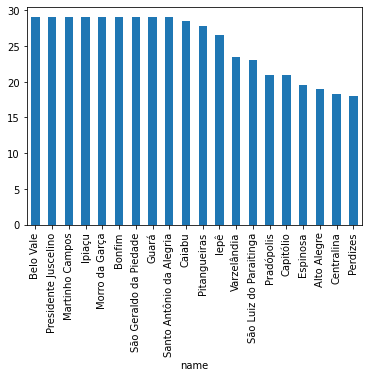

In [51]:
dfnan.groupby(['name']).sum()['letal'].sort_values(ascending=False)[:20].plot(kind='bar')

In [ ]:
df_SE.head()